In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("pearson_corr.csv")
df_month

,March_4,May_6,April_11,November_3,May,May_5,May_9,July,April_9,March_5,...,April_3,March,February_6,February_5,April_6,November_4,July_3,May_7,August_2,November_2
0,-0.793000,0.426002,-0.050333,0.827789,-0.221579,0.801848,-0.233783,-0.425964,0.133591,0.422374,...,0.474037,0.100928,-0.116549,-0.184646,0.581296,-0.360138,0.290080,-0.583192,0.100124,0.874171
1,0.095511,0.343893,-0.203332,0.827789,0.086009,0.247275,0.085172,-0.425964,0.146146,-0.020860,...,0.789259,-0.419456,-0.090999,0.324904,0.509800,-0.360138,0.290080,0.036485,0.100124,0.874171
2,0.481454,0.197382,-0.147272,0.192062,0.073576,-0.153567,-0.037057,-0.163479,0.100033,0.174689,...,0.770136,0.000503,-0.241412,-0.136173,0.570283,-0.147265,0.094743,-0.136102,0.096056,1.159349
3,-0.478691,-0.069665,-0.409264,0.484618,-0.365990,-0.274169,-0.227975,-0.314234,0.006054,0.221164,...,1.174132,-0.806541,-0.126016,0.186421,0.622885,-0.291265,0.614952,-0.255526,0.009094,1.073638
4,-0.566542,-0.835852,-0.523008,0.434227,-0.090789,0.327031,-0.348377,-0.573076,-0.124219,0.381737,...,0.156256,-0.653793,0.300532,0.184122,0.407397,-0.161633,-0.008511,-0.274046,0.072323,0.657452
5,0.000645,-0.070522,-0.524921,-0.226640,-0.207692,-0.153949,-0.054448,-0.615504,0.016689,0.159859,...,1.027568,-0.312365,-0.183712,-0.108579,0.525377,-0.774397,0.273664,0.218371,0.085677,0.824648
6,-0.718722,-0.573413,-0.221674,0.448013,-0.337707,-0.000117,0.106052,-0.362480,0.154757,-0.123122,...,0.653143,-0.445309,0.004519,0.056432,0.351998,-0.054764,-0.199239,-0.004548,0.270354,0.658131
7,0.061034,0.461886,-0.464792,0.431479,-0.424500,0.555998,-0.111373,0.313722,-0.186963,0.236468,...,0.469312,-0.092026,-0.125724,-0.143813,0.552520,-0.171861,0.547244,0.283851,0.011821,0.407619
8,-1.047455,0.548707,-0.331353,0.661389,-0.421281,-0.477346,0.277176,-0.705730,0.084944,0.191826,...,0.938394,0.255984,-0.327576,-0.401470,0.209464,0.079556,-0.339680,-0.138451,0.060354,0.673057
9,-0.421432,-0.522139,-0.194850,0.235838,-0.590899,0.547277,-0.006919,-0.650601,0.120713,0.276210,...,0.533788,-0.248735,-0.400550,0.153468,0.489990,-0.586774,0.105686,-0.093825,-0.050065,0.289282


In [4]:
df_month.columns


Index(['March_4', 'May_6', 'April_11', 'November_3', 'May', 'May_5', 'May_9',
       'July', 'April_9', 'March_5', 'March_3', 'August_4', 'July_7',
       'December_2', 'October', 'July_6', 'May_3', 'August_3', 'June_3',
       'May_8', 'May_2', 'April_7', 'February_4', 'April_8', 'July_2',
       'September', 'July_9', 'June_6', 'November_7', 'November_6', 'July_5',
       'October_2', 'June', 'October_3', 'April_4', 'February_3', 'November',
       'March_2', 'February', 'October_4', 'April', 'April_10', 'June_5',
       'July_8', 'July_4', 'April_5', 'June_4', 'May_4', 'December',
       'August_5', 'June_2', 'November_5', 'April_2', 'February_2', 'August',
       'April_3', 'March', 'February_6', 'February_5', 'April_6', 'November_4',
       'July_3', 'May_7', 'August_2', 'November_2'],
      dtype='object')

In [6]:
df_month = df_month[["October","October_2","October_3","October_4"]]

In [7]:
scaler = StandardScaler()

In [8]:
x_train = df_month.iloc[:42, :]
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.05186079, -0.37625916, -0.96116437,  0.03155232],
       [-1.05186079, -0.37625916, -0.96116437,  0.03155232],
       [ 1.63739144, -0.08845984,  0.57557406,  0.92662289],
       [-0.05559605, -2.29439794,  1.28521868, -0.10544734],
       [ 0.64258924, -0.90892503, -0.26623335,  0.25437819],
       [ 0.661045  ,  0.10983946,  1.23076737,  0.16065408],
       [ 0.38722039, -1.38800706,  0.72311734,  1.08142032],
       [ 0.31269186,  0.15110336,  0.91074871,  0.8750833 ],
       [-0.32174869, -0.1521753 ,  0.85280852,  0.09953762],
       [-0.02011184, -1.05508684,  0.66144589,  0.05026094],
       [-1.45252985, -1.36367293,  0.10144248, -0.86831956],
       [-2.24300564, -0.41997547,  0.15683211, -3.18083258],
       [ 0.94963332, -0.28202712,  1.37271894,  1.63241674],
       [-1.47813946,  0.07135504, -0.48977655,  0.35680296],
       [-1.15767596,  0.95217522, -1.80123403, -0.47373023],
       [ 1.65279398, -0.60947756,  0.82781798,  1.85899921],
       [-0.32198035, -0.

In [9]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [10]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [11]:
x_test = df_month.iloc[43:, :]
x_test = scaler.fit_transform(x_test)
x_test

array([[ 3.03902212e-01,  3.87558746e-01, -8.58571586e-01,
         9.88017691e-02],
       [ 6.49810217e-01,  8.93638601e-01, -8.62505517e-01,
         8.42881332e-01],
       [ 5.46467966e-01, -1.17450798e+00,  1.71197261e+00,
        -3.87580863e-01],
       [-6.15164240e-01, -6.95649552e-01,  5.18484812e-01,
         5.62916720e-01],
       [-3.77705287e-01, -1.05809673e+00,  7.59137714e-01,
        -1.16685561e+00],
       [-1.96525964e+00, -5.85051807e-02, -2.14860436e-03,
        -1.16304396e+00],
       [ 8.83472191e-01,  1.31773516e+00, -2.35240749e-01,
        -3.38723369e-01],
       [ 1.82184493e-01, -6.54165338e-01,  5.16685908e-01,
         1.48402938e+00],
       [ 1.06435783e+00, -2.64508565e-01, -8.34872924e-01,
         1.60953286e+00],
       [ 1.05092543e+00, -2.21076579e+00,  4.12833724e-01,
         1.78233857e+00],
       [ 3.09314720e-01,  4.68462532e-02, -1.52664287e+00,
        -8.64768022e-01],
       [-1.55620850e+00,  1.45814253e-01, -1.65893911e+00,
      

In [12]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [13]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [15]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 23}
Best Score: -0.013774832136212833
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 49}
Best Score: -0.02996957483085122
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 12}
Best Score: 0.0666337982547564
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 23}
Best Score: -0.005121053846744272
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 22}
Best Score: -0.07625274662052628


In [16]:
y_pred_list

[array([-0.0591842 , -0.2262676 , -0.14939083, -0.12317626,  0.01047419,
         0.09544296,  0.00869824, -0.22449165, -0.29425665, -0.29425665,
         0.19864205,  0.28361082, -0.38435668,  0.12690212,  0.04193335,
        -0.05929081]),
 array([-0.06535562, -0.14466336, -0.19670774, -0.0417334 , -0.02727466,
         0.06398763, -0.07355354, -0.14070484, -0.19212313, -0.23213801,
         0.03656767,  0.11980872, -0.28026754,  0.09437724,  0.06193731,
        -0.1621723 ]),
 array([-0.04655339, -0.37718828, -0.08842067, -0.2242855 ,  0.00857007,
         0.05647284,  0.00857007, -0.37718828, -0.44747474, -0.44747474,
         0.1945227 ,  0.24242548, -0.47417902,  0.05647284,  0.00857007,
        -0.06171639]),
 array([-0.03876212, -0.07586527, -0.06097274, -0.2147433 , -0.02428192,
         0.07523545,  0.11459611, -0.2147433 , -0.19486391, -0.22383131,
         0.34164008,  0.42195595, -0.14099254,  0.15670964,  0.11459611,
        -0.03283899]),
 array([-0.03378985, -0.04398091

In [17]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [18]:
correlation_list

[0.1873849388187809,
 0.43861826863565384,
 0.12808131221587585,
 0.14010704571416213,
 0.22458079930857378]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 23}
Best Score: -0.013774832136212833
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 49}
Best Score: -0.02996957483085122
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 12}
Best Score: 0.0666337982547564
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 23}
Best Score: -0.005121053846744272
Best Parameters: {'base_estimator__max_depth': 1, 'n_estimators': 22}
Best Score: -0.07625274662052628


In [21]:
y_pred_list_rf

[array([-0.0591842 , -0.2262676 , -0.14939083, -0.12317626,  0.01047419,
         0.09544296,  0.00869824, -0.22449165, -0.29425665, -0.29425665,
         0.19864205,  0.28361082, -0.38435668,  0.12690212,  0.04193335,
        -0.05929081]),
 array([-0.06535562, -0.14466336, -0.19670774, -0.0417334 , -0.02727466,
         0.06398763, -0.07355354, -0.14070484, -0.19212313, -0.23213801,
         0.03656767,  0.11980872, -0.28026754,  0.09437724,  0.06193731,
        -0.1621723 ]),
 array([-0.04655339, -0.37718828, -0.08842067, -0.2242855 ,  0.00857007,
         0.05647284,  0.00857007, -0.37718828, -0.44747474, -0.44747474,
         0.1945227 ,  0.24242548, -0.47417902,  0.05647284,  0.00857007,
        -0.06171639]),
 array([-0.03876212, -0.07586527, -0.06097274, -0.2147433 , -0.02428192,
         0.07523545,  0.11459611, -0.2147433 , -0.19486391, -0.22383131,
         0.34164008,  0.42195595, -0.14099254,  0.15670964,  0.11459611,
        -0.03283899]),
 array([-0.03378985, -0.04398091

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.1873849388187809,
 0.43861826863565384,
 0.12808131221587585,
 0.14010704571416213,
 0.22458079930857378]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'15_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 15p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'15p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/15 predictors/pearson/comparison plots/randomforest


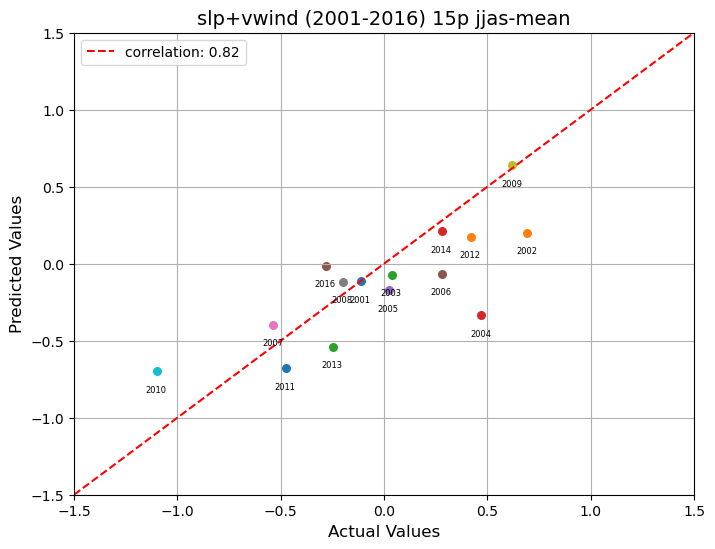

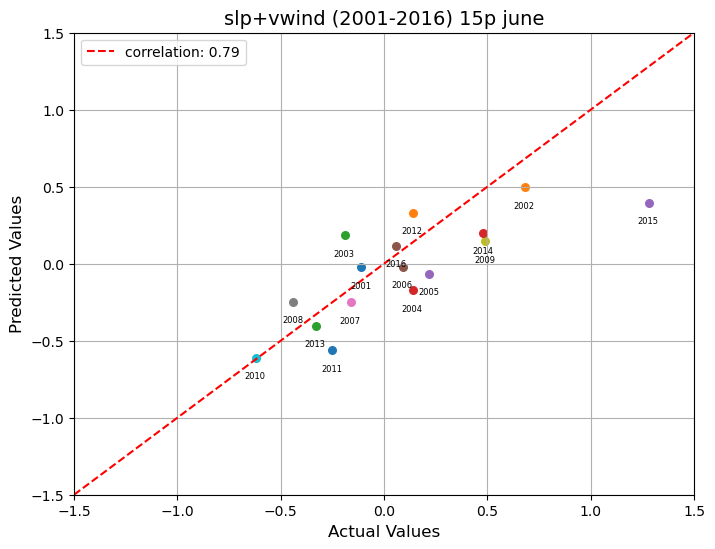

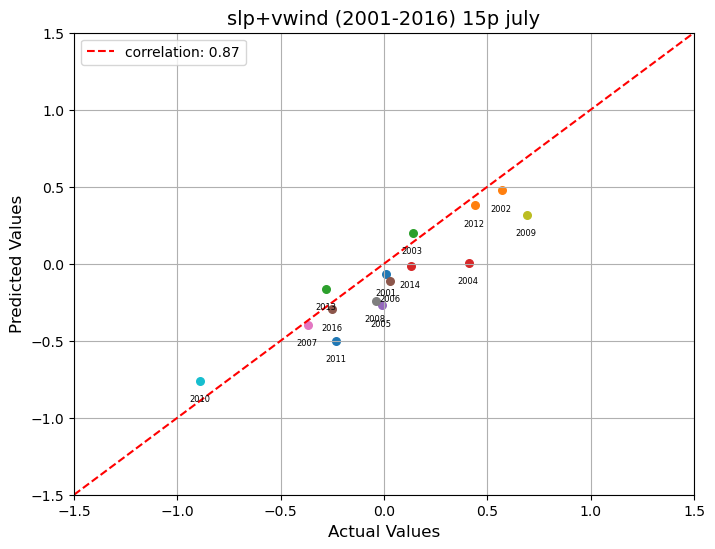

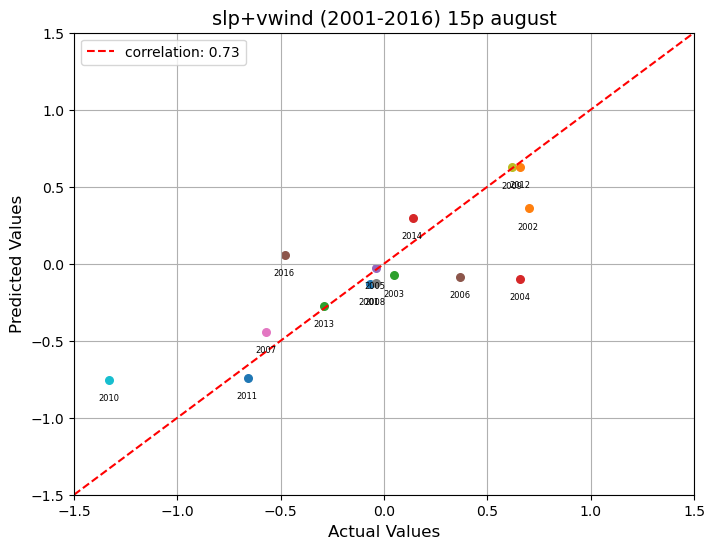

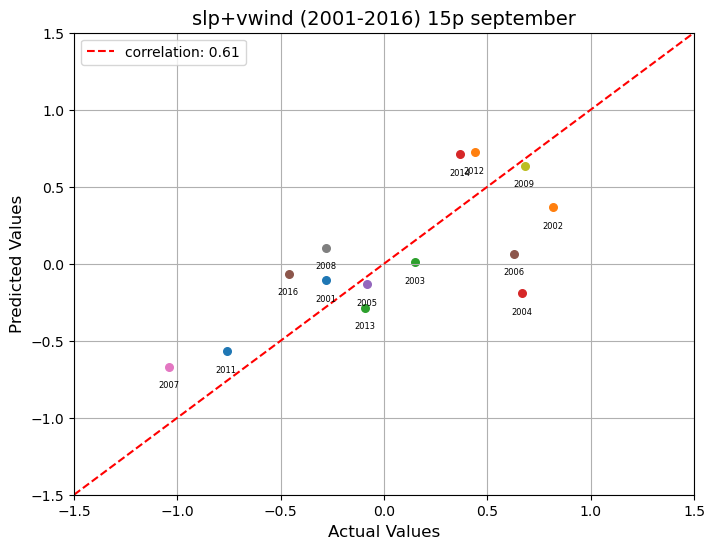

In [28]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=30)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-1.5, 1.5], [-1.5, 1.5], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-1.5, 1.5)  # Set limits from -2 to 2
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.show

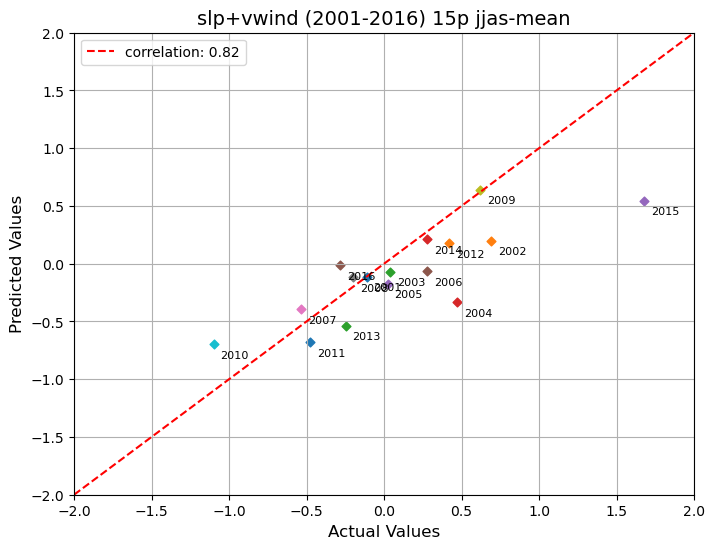

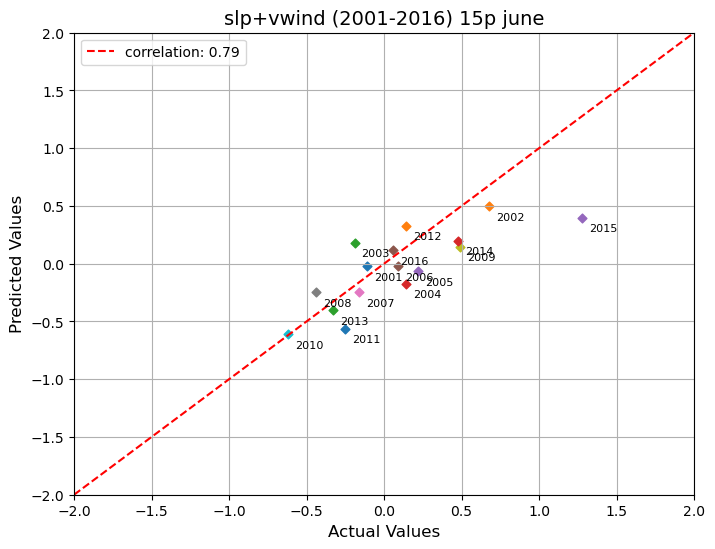

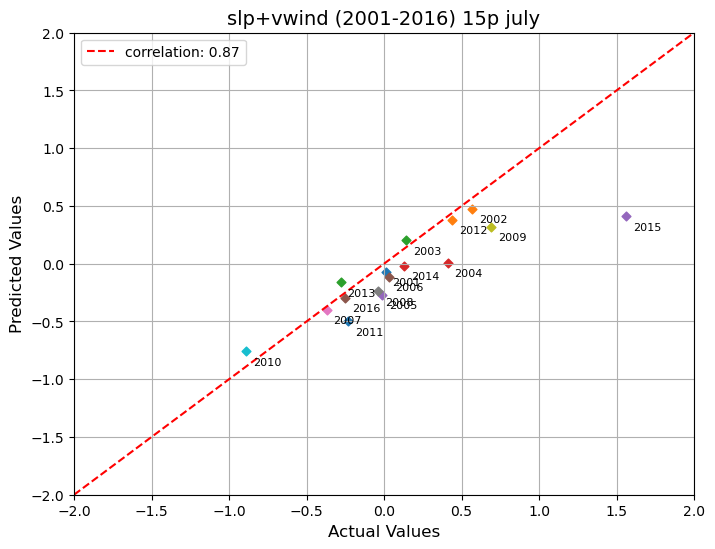

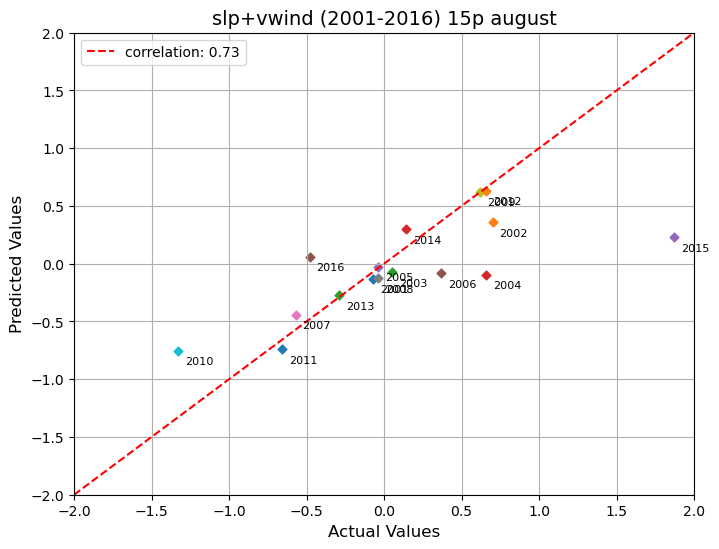

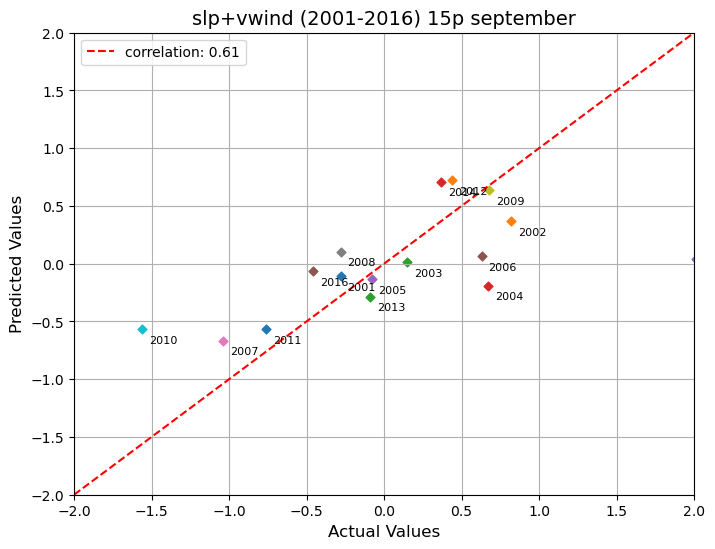

In [41]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=20,marker='D')
        plt.annotate(f"{year}", (actual, predicted), xytext=(5, -10), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 15p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.savefig("Naveen"+str(i)+".tiff")
    plt.show

In [31]:
pred = pd.read_csv("paper_predic.csv")
pred

,JJAS_MEAN,JUNE,JULY,AUGUST,SEPTEMBER
0,-0.317204,-0.253406,-0.026882,-0.068966,-0.520970
1,0.564516,0.433243,0.134409,0.090186,0.593054
2,0.010753,-0.118529,0.139785,-0.238727,-0.219528
3,0.532258,0.138965,0.317204,1.151194,0.403014
4,0.134409,0.298365,-0.043011,0.063660,0.173657
5,-0.172043,0.110354,0.387097,0.344828,0.403014
6,-0.188172,-0.257493,-0.548387,-0.450928,-0.501311
7,-0.510753,-0.441417,-0.107527,-0.090186,-0.075360
8,0.129032,0.474114,0.150538,0.350133,0.520970
9,-1.048387,-0.081744,-0.752688,-0.328912,-0.671691


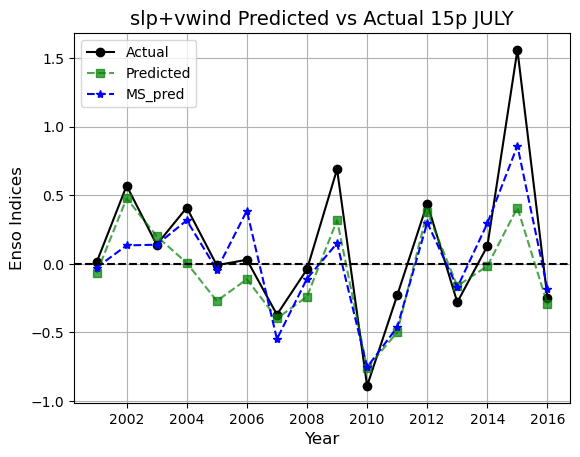

In [32]:
plt.plot(df['year'][43:], y_test[2], label='Actual', color='black', marker='o', linestyle='-')
plt.plot(df['year'][43:], y_pred_list_rf[2], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)
plt.plot(df['year'][43:], pred["JULY"], label='MS_pred', color='blue', marker='*', linestyle='--')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Enso Indices', fontsize=12)
plt.title(f'slp+vwind Predicted vs Actual 15p JULY', fontsize=14)
plt.legend(loc='upper left')